## $k$-means clustering: An example implementation in Python 3 using numpy and matplotlib.

The [$k$-means](https://en.wikipedia.org/wiki/K-means_clustering) algorithm is an unsupervised learning method for identifying clusters within a dataset. The $k$ represents the number of clusters to be identified, which is specified by the user before starting the algorithm.

The algorithm goes like this:

* Initialize the $k$ cluster centroids.
* Repeat:
    1. Cluster assignment: Assign each data point to the nearest cluster centroid.
    2. Cluster updating: For each cluster centroid, average the locations of it's corresponding points and re-assign the centroid to that location.
    
The last two steps are repeated until stopping criteria are met such as a maximum number of iterations or the centroid velocity drops below a threshold. The results of the algorithm can be highly dependent on the cluster initialization step, especially when there are a large number of clusters and data points. Performance be improved in a few different ways such as running it multiple times and averaging the results or using different initalization methods such as [$k$-means plus plus](https://en.wikipedia.org/wiki/K-means%2B%2B). Here, we will initialize the $k$ cluster centroids by selecting $k$ random data points.

Mathematically, the cluster assignment step can be written as:

$c^{(i)} = argmin_{k} \left\lVert x^{(i)} - \mu_k\right\rVert^2$

where $c^{(i)}$ is the centroid closest to sample $x^{(i)}$ and $\mu_k$ represents the $k$-th centroid.

Similarly, the cluster update step can be written as:

$\mu_k = \frac{1}{n}[x^{(k_1)}+x^{(k_2)}+...+x^{(k_n)}]$

where, again $\mu_k$ represents the $k$-th centroid and $x^{(k_n)}$ are the training examples assigned to that centroid.

First, some imports.

In [1]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.datasets import make_blobs

Next we'll define some functions based on steps in the K-means algorithm.

In [2]:
def initialize_clusters(points, k):
    """Initializes clusters as k randomly selected points from points."""
    return points[np.random.randint(points.shape[0], size=k)]
    
# Function for calculating the distance between centroids
def get_distances(centroid, points):
    """Returns the distance the centroid is from each data point in points."""
    return np.linalg.norm(points - centroid, axis=1)

Here we'll generate some data using [scikit-learn](http://scikit-learn.org)'s [`make_blobs`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs) function. For this example we'll generate a dataset with three clusters. Using this function will give us access to the actual class labels for each group so we can assess accuracy later if we would like to. Normally when using K-means, you won't know the cluster assignments or the number of clusters in the dataset!

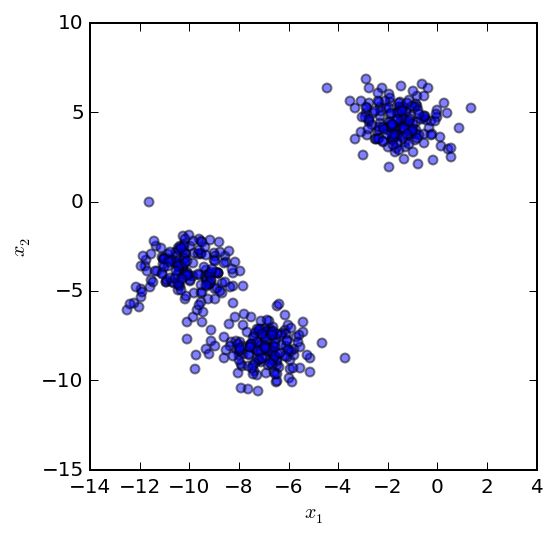

In [3]:
# Generate dataset
X, y = make_blobs(centers=3, n_samples=500, random_state=1)

# Visualize
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(X[:,0], X[:,1], alpha=0.5)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Now let's implement K-means using k = 3.

In [4]:
k = 3
maxiter = 50

# Initialize our centroids by picking random data points
centroids = initialize_clusters(X, k)

# Initialize the vectors in which we will store the
# assigned classes of each data point and the
# calculated distances from each centroid
classes = np.zeros(X.shape[0], dtype=np.float64)
distances = np.zeros([X.shape[0], k], dtype=np.float64)

# Loop for the maximum number of iterations
for i in range(maxiter):
    
    # Assign all points to the nearest centroid
    for i, c in enumerate(centroids):
        distances[:, i] = get_distances(c, X)
        
    # Determine class membership of each point
    # by picking the closest centroid
    classes = np.argmin(distances, axis=1)
    
    # Update centroid location using the newly
    # assigned data point classes
    for c in range(k):
        centroids[c] = np.mean(X[classes == c], 0)

Once we've finished running the algorithm, we can visualize the classified data and our calculated centroids locations.

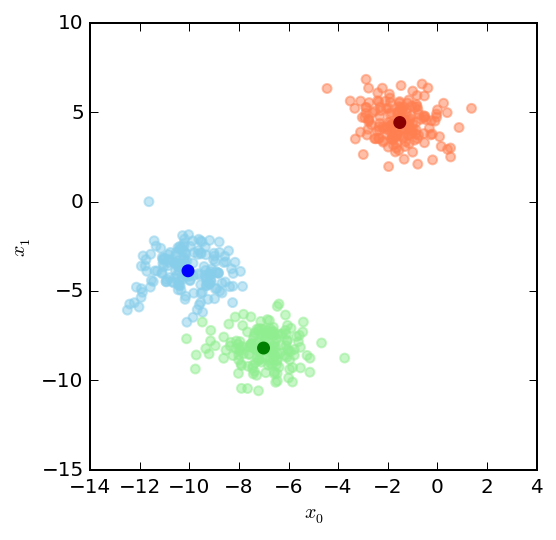

In [5]:
group_colors = ['skyblue', 'coral', 'lightgreen']
colors = [group_colors[j] for j in classes]

fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(X[:,0], X[:,1], color=colors, alpha=0.5)
ax.scatter(centroids[:,0], centroids[:,1], color=['blue', 'darkred', 'green'], marker='o', lw=2)
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$');

Look's pretty good! In another post I'll discuss some limitations of the $k$-means algorithm and assess what happens when $k$ is chosen to be greater than or less than the actual number of clusters in your dataset.